# Tutorial 1: SDSS Query

Instructor: Isidora Jankov

Student: Ridha Fathima Mohideen Malik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astroquery.sdss import SDSS

## Querying on Python

1. Select galaxies and quasars with redshifts between 0.05 and 0.3 and signalto-noise ratios greater than 35 near the Hβ line. Ensure that lines [O III] λ5007, Hβ λ4863, and Hγ λ4341 are present in emission and that the FWHM of Hβ is greater than 1000 km/s. For each selected spectrum, find the flux ratios of [OIII]/Hβ, Hβ/Hγ, and [O III]/Hγ, as well as the equivalent width and flux of Hβ, redshift, and extinction correction: E(B-V) of type SFD (tip: the last one find in galSpecInfo table).

I used the following query using https://skyserver.sdss.org/dr18/SearchTools/sql:

``` SELECT 
s.plate, s.mjd, s.fiberid, 
s.z, g.subclass, g.e_bv_sfd,
l.h_beta_flux, l.h_beta_eqw,
(l.oiii_5007_flux/l.h_beta_flux) as oiii_h_beta_flux_ratio,
(l.oiii_5007_flux/l.h_gamma_flux) as oiii_h_gamma_flux_ratio,
(l.h_beta_flux/l.h_gamma_flux) as h_beta_h_gamma_flux_ratio

FROM SpecObjAll AS s
JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid
JOIN GalSpecLine AS l ON s.specobjid = l.specobjid

WHERE
(s.class = "QSO" OR s.class = "GALAXY")
AND s.z BETWEEN 0.05 AND 0.6
AND s.snmedian_g > 35
AND l.h_gamma_eqw < 0
AND l.h_beta_eqw < 0
AND l.oiii_5007_eqw < 0
AND l.h_gamma_flux <> 0
AND l.h_beta_flux <> 0
AND l.oiii_5007_flux <> 0
AND l.sigma_balmer * 2.35 > 1000
```

Alternatively, this could be done with python as follows.

Resulting table in *420primary.csv*

In [108]:
with open('query.txt', 'r') as file:
    query = file.read().replace('\n', '') # input is a single string

res = SDSS.query_sql(query)
res # output is an astropy table

plate,mjd,fiberid,z,subclass,e_bv_sfd,h_beta_flux,h_beta_eqw,oiii_h_beta_flux_ratio,oiii_h_gamma_flux_ratio,h_beta_h_gamma_flux_ratio
int32,int32,int32,float64,bytes21,float64,float64,float64,float64,float64,float64
390,51900,587,0.4023389,BROADLINE,0.02475606,452.5197,-5.943464,0.9807814,1.645157,1.677394
355,51788,414,0.09262062,STARBURST BROADLINE,0.04385718,1590.3,-10.94744,0.7112553,1.879482,2.642485
1233,52734,312,0.4144244,BROADLINE,0.02098736,819.0699,-7.303505,1.496639,2.169284,1.449437
2227,53820,252,0.4759276,BROADLINE,0.0200961,292.3211,-5.62268,2.68038,3.758329,1.402163
519,52283,280,0.2402315,BROADLINE,0.02099199,2368.552,-10.43072,1.031102,2.025708,1.964605
2156,54525,122,0.3813043,BROADLINE,0.03792301,455.8603,-9.231826,0.4967186,1.029048,2.071693
2647,54495,378,0.0581607,,0.01662156,33.89186,-0.4854688,1.305768,1.048939,0.8033115
494,51915,124,0.1842309,BROADLINE,0.01408172,1780.146,-14.36981,1.842156,3.919306,2.127565
607,52368,581,0.5525806,BROADLINE,0.01419172,567.0939,-11.73849,0.4498428,1.061532,2.359785


2. How many objects have you found? Which one from the conditions in WHERE is narrowing the results most severely? (TIP: one needs to play with this for a while...)

|condition|count|
---| ---|
|all|420|
|z removed|1621|
|sn removed|35502|
|fwhm 500|467|
|fwhm removed|623|

The signal-to-noise ratio condition has the most impact on the result.

3. Find out if there is some of the Subclass AGN objects, with the same conditions under 1. Adopt your code to get result.

Yes, Broadline AGNs

## Crossmatching

4. Using the problem solution under 1 and the list of objects (287-plate-mjdfiber.txt) submit the SQL query via CrossID. (TIP: you will need to alter the SQL code prepared under 1 to fit requirements of CrossID. Follow the comments you get and be patient)

```
CREATE TABLE #upload ( up_id int, up_plate int, up_mjd int, up_fiber int ) 
INSERT INTO #upload values ( 1, 1949, 53433, 472),( 2, 1273, 52993, 348),( 3, 2030, 53499, 201),( 4, 2520, 54584, 442),( 5, 1940, 53383, 407),( 6, 561, 52295, 618),( 7, 1603, 53119, 558),( 8, 453, 51915, 212),( 9, 1427, 52996, 606),( 10, 464, 51908, 576),( 11, 634, 52164, 430),( 12, 2020, 53431, 614),( 13, 2007, 53474, 171),( 14, 916, 52378, 434),( 15, 603, 52056, 415),( 16, 2089, 53498, 385),( 17, 625, 52145, 288),( 18, 436, 51883, 16),( 19, 999, 52636, 334),( 20, 1683, 53436, 16),( 21, 2425, 54139, 442),( 22, 433, 51873, 422),( 23, 465, 51910, 603),( 24, 513, 51989, 340),( 25, 366, 52017, 584),( 26, 329, 52056, 577),( 27, 564, 52224, 368),( 28, 564, 52224, 471),( 29, 753, 52233, 455),( 30, 755, 52235, 225),( 31, 1052, 52466, 370),( 32, 738, 52521, 95),( 33, 993, 52710, 147),( 34, 914, 52721, 74),( 35, 1351, 52790, 428),( 36, 1342, 52793, 157),( 37, 1864, 53313, 353),( 38, 2491, 53855, 252),( 39, 848, 52669, 418),( 40, 555, 52266, 74),( 41, 1371, 52821, 377),( 42, 1844, 54138, 112),( 43, 1417, 53141, 441),( 44, 2783, 54524, 432),( 45, 2641, 54230, 570),( 46, 490, 51929, 126),( 47, 1796, 53884, 591),( 48, 2509, 54180, 244),( 49, 2647, 54495, 160),( 50, 2488, 54149, 521),( 51, 1186, 52646, 98),( 52, 2164, 53886, 503),( 53, 640, 52178, 513),( 54, 2646, 54479, 204),( 55, 2583, 54095, 615),( 56, 2501, 54084, 120),( 57, 2128, 53800, 415),( 58, 2518, 54243, 374),( 59, 413, 51929, 598),( 60, 837, 52642, 298),( 61, 2645, 54477, 133),( 62, 2353, 53794, 600),( 63, 1843, 53816, 584),( 64, 2970, 54589, 373),( 65, 967, 52636, 44),( 66, 767, 52252, 300),( 67, 593, 52026, 111),( 68, 984, 52442, 383),( 69, 1429, 52990, 584),( 70, 2769, 54527, 354),( 71, 2532, 54589, 90),( 72, 2166, 54232, 30),( 73, 2281, 53711, 431),( 74, 2420, 54086, 240),( 75, 597, 52059, 337),( 76, 1598, 53033, 291),( 77, 1237, 52762, 497),( 78, 593, 52026, 170),( 79, 656, 52148, 282),( 80, 461, 51910, 74),( 81, 1750, 53358, 564),( 82, 764, 52238, 53),( 83, 2512, 53877, 582),( 84, 469, 51913, 238),( 85, 892, 52378, 395),( 86, 268, 51633, 235),( 87, 1793, 53883, 573),( 88, 1598, 53033, 604),( 89, 2595, 54207, 541),( 90, 1817, 53851, 69),( 91, 349, 51699, 613),( 92, 2440, 53818, 539),( 93, 1713, 53827, 63),( 94, 567, 52252, 558),( 95, 1690, 53475, 634),( 96, 385, 51877, 61),( 97, 2351, 53772, 99),( 98, 1230, 52672, 503),( 99, 1431, 52992, 572),( 100, 2971, 54590, 326),( 101, 1575, 53493, 484),( 102, 2764, 54535, 53),( 103, 1773, 53112, 301),( 104, 498, 51984, 104),( 105, 411, 51817, 381),( 106, 2034, 53466, 230),( 107, 637, 52174, 259),( 108, 2529, 54585, 300),( 109, 600, 52317, 490),( 110, 1223, 52781, 625),( 111, 551, 51993, 179),( 112, 2478, 54097, 377),( 113, 721, 52228, 454),( 114, 1676, 53147, 55),( 115, 1626, 53472, 449),( 116, 614, 53437, 452),( 117, 1754, 53385, 324),( 118, 2364, 53737, 469),( 119, 2606, 54154, 614),( 120, 1775, 53847, 420),( 121, 1791, 54266, 46),( 122, 2080, 53350, 309),( 123, 2294, 53733, 607),( 124, 1838, 53467, 451),( 125, 2351, 53772, 616),( 126, 1167, 52738, 476),( 127, 1695, 53473, 612),( 128, 1989, 53772, 559),( 129, 1667, 53430, 114),( 130, 2885, 54497, 561),( 131, 2008, 53473, 615),( 132, 2347, 53757, 326),( 133, 2341, 53738, 66),( 134, 1378, 53061, 413),( 135, 1949, 53433, 437),( 136, 1779, 53089, 106),( 137, 1201, 52674, 225),( 138, 752, 52251, 20),( 139, 511, 52636, 567),( 140, 2424, 54448, 109),( 141, 1428, 52998, 558),( 142, 2101, 53858, 348),( 143, 666, 52149, 24),( 144, 628, 52083, 461),( 145, 793, 52370, 549),( 146, 1714, 53521, 11),( 147, 1872, 53386, 371),( 148, 1725, 54266, 540),( 149, 1944, 53385, 412),( 150, 2522, 54570, 131),( 151, 664, 52174, 455),( 152, 939, 52636, 172),( 153, 2347, 53757, 151),( 154, 836, 52376, 262),( 155, 1329, 52767, 542),( 156, 773, 52376, 629),( 157, 1433, 53035, 148),( 158, 2376, 53770, 497),( 159, 2592, 54178, 153),( 160, 1455, 53089, 584),( 161, 899, 52620, 626),( 162, 723, 52201, 500),( 163, 896, 52592, 63),( 164, 597, 52059, 520),( 165, 554, 52000, 553),( 166, 1453, 53084, 10),( 167, 1865, 53312, 572),( 168, 942, 52703, 488),( 169, 897, 52605, 242),( 170, 2222, 53799, 388),( 171, 1847, 54176, 630),( 172, 1807, 54175, 9),( 173, 1364, 53061, 185),( 174, 795, 52378, 381),( 175, 2517, 54567, 624),( 176, 1372, 53062, 488),( 177, 1367, 53083, 629),( 178, 1773, 53112, 405),( 179, 2583, 54095, 462),( 180, 932, 52620, 110),( 181, 2237, 53828, 93),( 182, 1604, 53078, 281),( 183, 2173, 53874, 354),( 184, 408, 51821, 611),( 185, 768, 52281, 85),( 186, 1694, 53472, 540),( 187, 1394, 53108, 44),( 188, 411, 51817, 519),( 189, 1941, 53386, 545),( 190, 653, 52145, 185),( 191, 2106, 53714, 130),( 192, 994, 52725, 86),( 193, 2152, 53874, 108),( 194, 1714, 53521, 571),( 195, 1378, 53061, 488),( 196, 1606, 53055, 166),( 197, 1195, 52724, 98),( 198, 1854, 53566, 151),( 199, 2772, 54529, 38),( 200, 650, 52143, 126),( 201, 1843, 53816, 8),( 202, 1619, 53084, 60),( 203, 722, 52224, 281),( 204, 2023, 53851, 65),( 205, 526, 52312, 378),( 206, 2003, 53442, 501),( 207, 510, 52381, 509),( 208, 2365, 53739, 591),( 209, 2617, 54502, 287),( 210, 666, 52149, 496),( 211, 2526, 54582, 404),( 212, 409, 51871, 213),( 213, 1803, 54152, 323),( 214, 1795, 54507, 509),( 215, 2362, 53759, 295),( 216, 1926, 53317, 378),( 217, 860, 52319, 583),( 218, 2216, 53795, 298),( 219, 1810, 53794, 504),( 220, 2508, 53875, 353),( 221, 1744, 53055, 387),( 222, 1271, 52974, 462),( 223, 1214, 52731, 160),( 224, 2493, 54115, 278),( 225, 1735, 53035, 322),( 226, 1218, 52709, 201),( 227, 1457, 53116, 421),( 228, 607, 52368, 581),( 229, 767, 52252, 453),( 230, 2102, 54115, 18),( 231, 2352, 53770, 242),( 232, 507, 52353, 161),( 233, 2613, 54481, 620),( 234, 976, 52413, 574),( 235, 814, 52443, 467),( 236, 2265, 53674, 87),( 237, 1645, 53172, 526),( 238, 2615, 54483, 404),( 239, 987, 52523, 157),( 240, 792, 52353, 116),( 241, 2744, 54272, 535),( 242, 1728, 53228, 218),( 243, 1716, 53827, 350),( 244, 2007, 53474, 226),( 245, 827, 52312, 621),( 246, 882, 52370, 376),( 247, 1199, 52703, 596),( 248, 1402, 52872, 594),( 249, 1446, 53080, 135),( 250, 2615, 54483, 257),( 251, 594, 52045, 73),( 252, 2276, 53712, 508),( 253, 1845, 54144, 637),( 254, 1362, 53050, 119),( 255, 596, 52370, 483),( 256, 2151, 54523, 527),( 257, 1215, 52725, 150),( 258, 1224, 52765, 379),( 259, 1843, 53816, 502),( 260, 856, 52339, 50),( 261, 1440, 53084, 137),( 262, 941, 52709, 616),( 263, 2233, 53845, 196),( 264, 1592, 52990, 18),( 265, 2795, 54563, 140),( 266, 2428, 53801, 356),( 267, 489, 51930, 402),( 268, 795, 52378, 528),( 269, 1214, 52731, 77),( 270, 1005, 52703, 518),( 271, 402, 51793, 479),( 272, 2242, 54153, 199),( 273, 1004, 52723, 280),( 274, 1310, 53033, 559),( 275, 1380, 53084, 58),( 276, 1054, 52516, 309),( 277, 2492, 54178, 562),( 278, 2955, 54562, 608),( 279, 353, 51703, 546),( 280, 644, 52173, 413),( 281, 1432, 53003, 91),( 282, 741, 52261, 116),( 283, 1171, 52753, 416),( 284, 2774, 54534, 51),( 285, 2485, 54176, 231),( 286, 2292, 53713, 348)
SELECT 
s.plate, s.mjd, s.fiberid, 
s.z, g.subclass, g.e_bv_sfd,
l.h_beta_flux, l.h_beta_eqw,
(l.oiii_5007_flux/l.h_beta_flux) as oiii_h_beta_flux_ratio,
(l.oiii_5007_flux/l.h_gamma_flux) as oiii_h_gamma_flux_ratio,
(l.h_beta_flux/l.h_gamma_flux) as h_beta_h_gamma_flux_ratio

FROM #upload u
JOIN 
SpecObjAll AS s 
ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberID=u.up_fiber)
JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid
JOIN GalSpecLine AS l ON s.specobjid = l.specobjid

WHERE
(s.class = "QSO" OR s.class = "GALAXY")
AND s.z BETWEEN 0.05 AND 0.6
AND s.snmedian_g > 35
AND l.h_gamma_eqw < 0
AND l.h_beta_eqw < 0
AND l.oiii_5007_eqw < 0
AND l.h_gamma_flux > 0
AND l.h_beta_flux > 0
AND l.oiii_5007_flux > 0
AND (l.sigma_balmer * 2.35) > 1000
```

This produced 47 rows. Results in *47crossmatch.csv*

I rechecked with pandas:

In [5]:
given = pd.read_csv("287-plate-MJD-fiberID.txt", sep=r'\s+|\t', engine='python', header=None)
given.head()

,redshift,h_beta_eqw,h_beta_flux,Column1,Column2,Column3,spectofiber,plate,mjd,fiberID
0,0.599349,-11.40223,3992.1940,0.252373,2.374881,0.599357,0.731025,637,52174,259
1,0.434385,-15.68500,1279.6670,0.646228,2.294816,1.482974,0.748482,1754,53385,324
2,0.468860,-10.00354,552.9328,0.637080,2.148320,1.368653,0.938292,555,52266,74
3,0.468984,-20.90205,1784.6600,0.186969,2.345961,0.438622,0.784193,976,52413,574
4,0.435857,-11.22126,178.4678,3.537334,1.718534,6.079030,0.281381,2520,54584,442


In [6]:
got = pd.read_csv("420primary.csv", sep=',', header=0, comment='#')
got.head()

,plate,mjd,fiberid,z,subclass,e_bv_sfd,h_beta_flux,h_beta_eqw,oiii_h_beta_flux_ratio,oiii_h_gamma_flux_ratio,h_beta_h_gamma_flux_ratio
0,300,51666,135,0.599775,BROADLINE,0.039406,2747.5760,-21.376590,0.398863,0.874091,2.191457
1,412,52258,129,0.080176,BROADLINE,0.065049,2925.6050,-12.630870,0.559593,1.125262,2.010858
2,554,52000,553,0.473671,BROADLINE,0.025234,961.0248,-8.415974,1.069571,1.917614,1.792881
3,555,52266,74,0.468860,BROADLINE,0.021617,552.9328,-10.003540,0.637080,1.368653,2.148320
4,1012,52649,74,0.102776,BROADLINE,0.012979,3461.1010,-22.343320,0.722970,1.699948,2.351340


In [8]:
for id, plate_given, mjd_given, fiber_given in zip(given.index, given['plate'], given['mjd'], given['fiberID']):
        for plate_got, mjd_got, fiber_got in zip(got['plate'], got['mjd'], got['fiberid']):
                if plate_given == plate_got and mjd_given == mjd_got and fiber_given == fiber_got:
                        given.loc[id, 'found'] = "yes"
    

In [9]:
len(given[given['found']=="yes"])

47

In [101]:
result = pd.read_csv("47crossmatch.csv", sep=',', header=0, comment='#')

## Understanding the spectrum file

5. Check the spectra of found objects, download some of them using wget. 
6. BONUS: read downloaded fits files and plot the spectra using Python.

Since the SAS server was down, I explored other options to download spectra. Here I am employing astroquery to plot and understand the results.

In [119]:
sp = SDSS.get_spectra(plate=result.loc[1,"plate"], mjd=result.loc[1,"mjd"], fiberID=result.loc[1,"fiberid"]) # list of HDUs
sp[0].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  COADD         1 BinTableHDU     26   3848R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B2-00006798-00006802-00006803    1 BinTableHDU    145   2047R x 7C   [E, E, E, J, E, E, E]   
  5  B2-00006799-00006802-00006803    1 BinTa

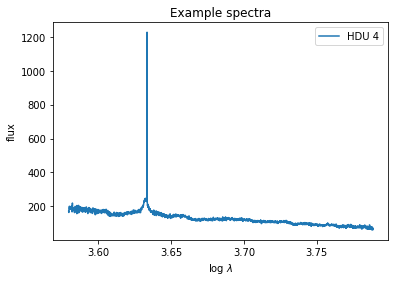

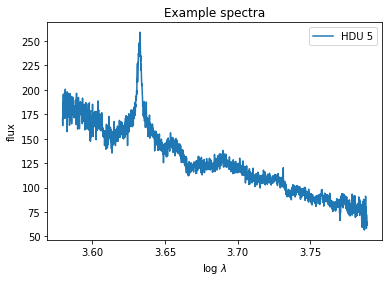

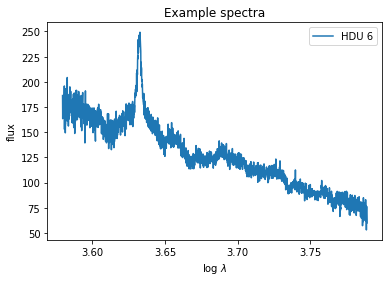

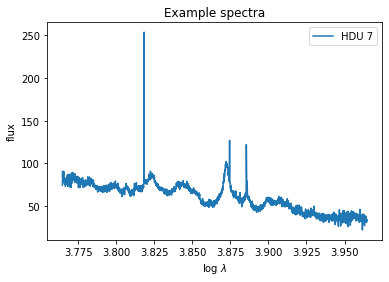

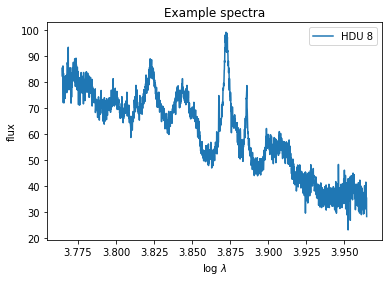

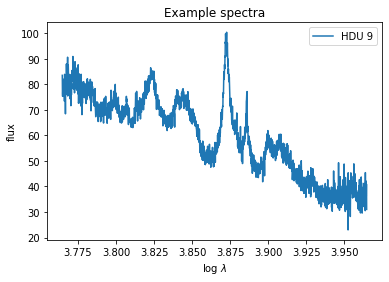

In [121]:
for i in range(4,10):
    spectrum = sp[0][i]
    plt.plot(spectrum.data['loglam'], spectrum.data['flux'], label='HDU '+str(i))
    plt.xlabel(r'log $\lambda$')
    plt.ylabel('flux')
    plt.title(f"Example spectra")
    plt.legend()
    plt.show()

Observations:
- HDUs 4-6 are the bluer wavelengths and 7-9 correspond to the redder wavelengths
- HDUs 6 and 9 are the reduced results

### Final 47 spectra

#  1


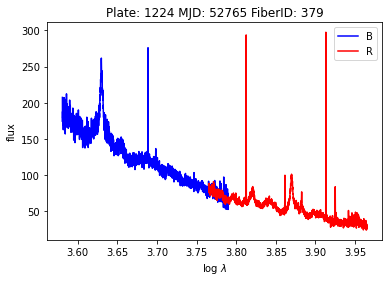

#  2


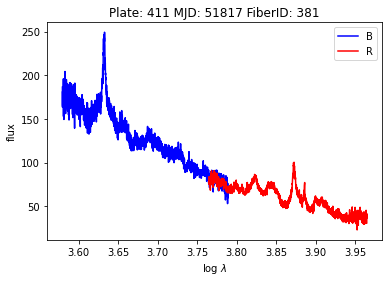

#  3


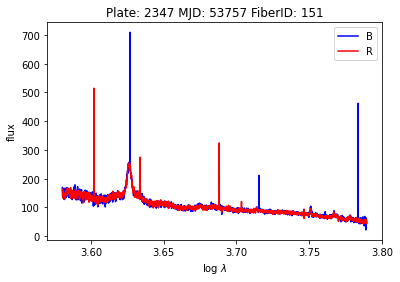

#  4


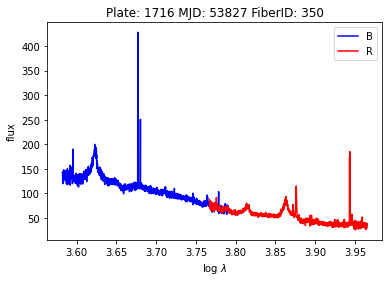

#  5


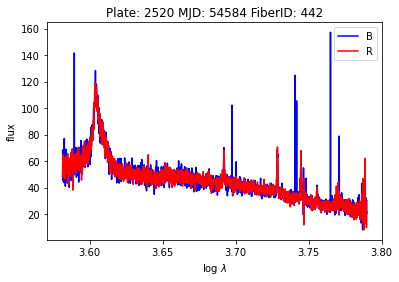

#  6


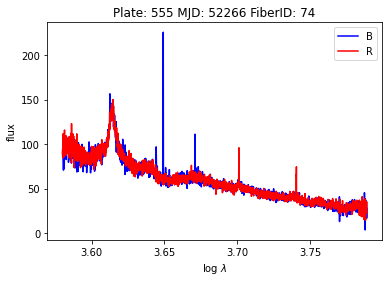

#  7


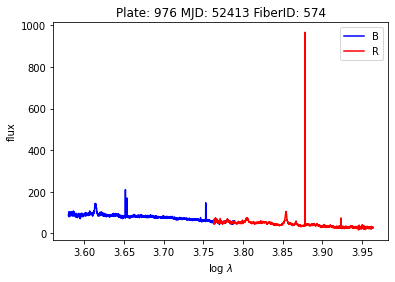

#  8


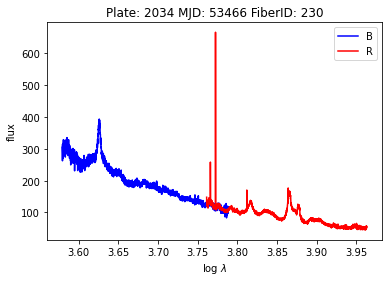

#  9


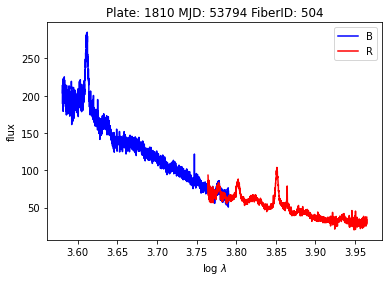

#  10


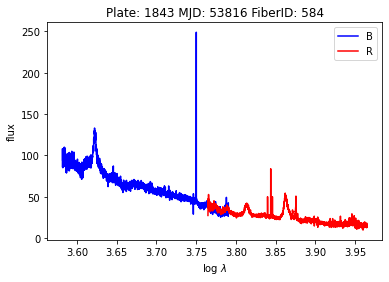

#  11


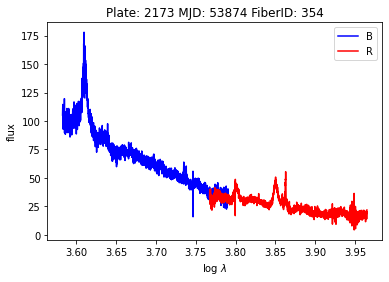

#  12


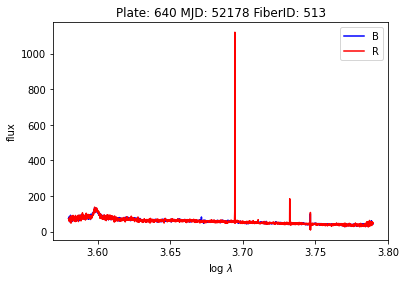

#  13


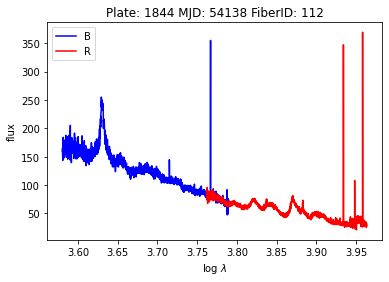

#  14


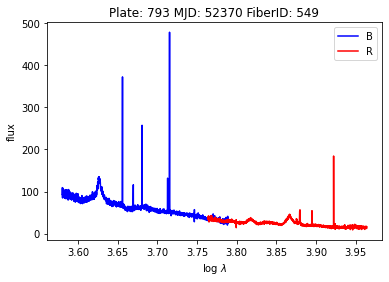

#  15


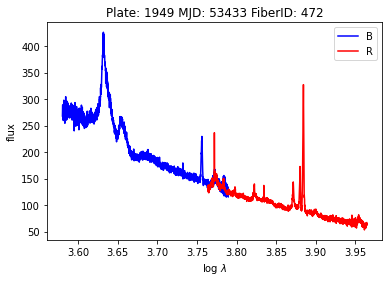

#  16


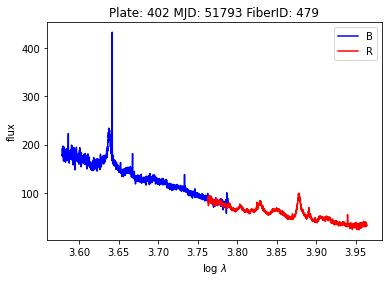

#  17


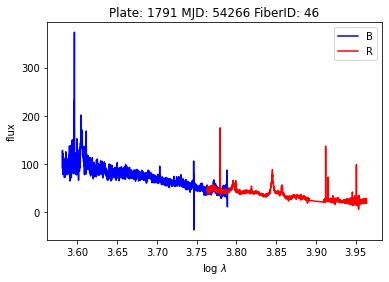

#  18


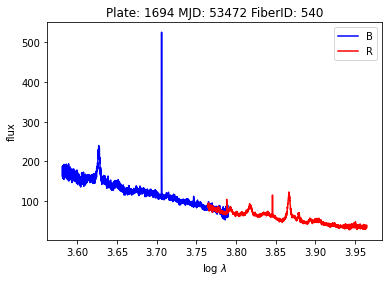

#  19


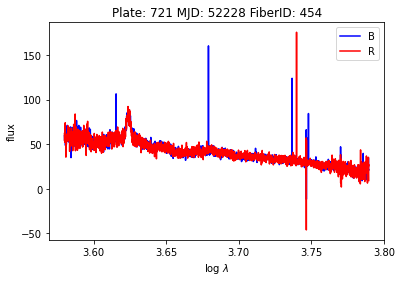

#  20


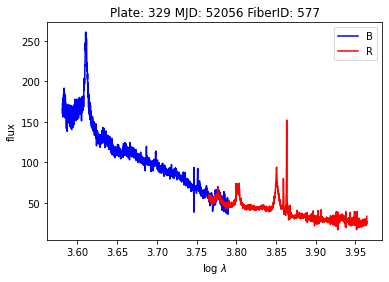

#  21


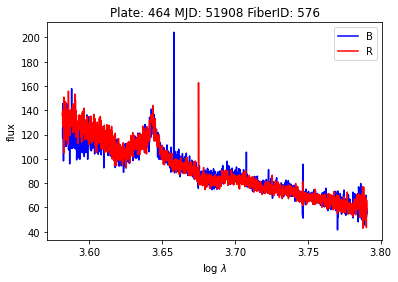

#  22


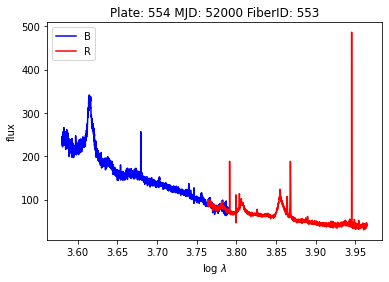

#  23


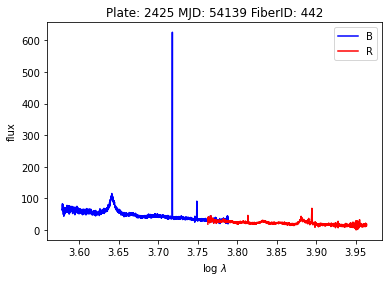

#  24


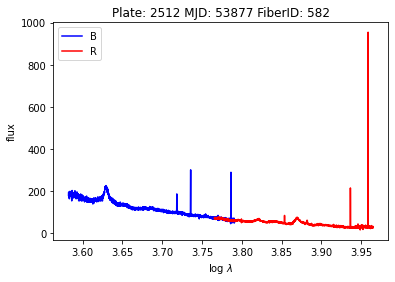

#  25


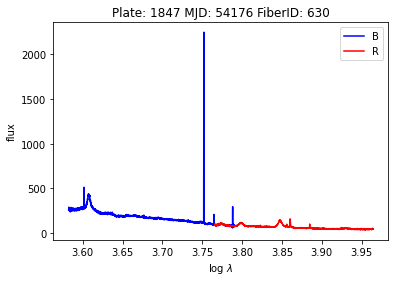

#  26


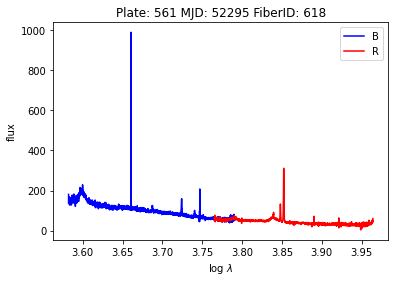

#  27


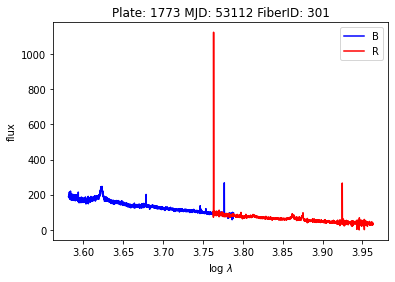

#  28


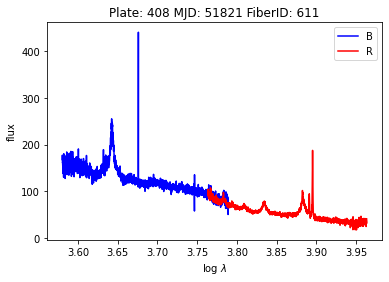

#  29


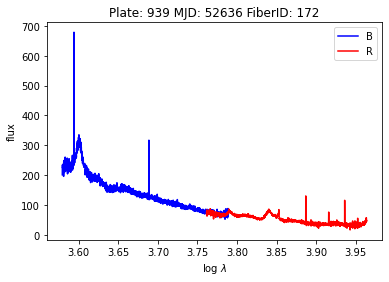

#  30


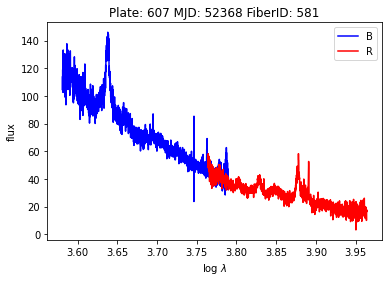

#  31


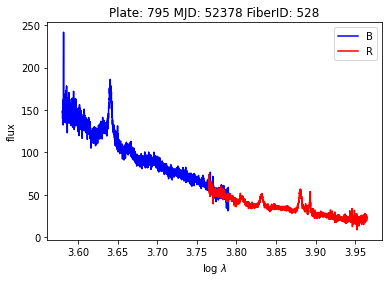

#  32


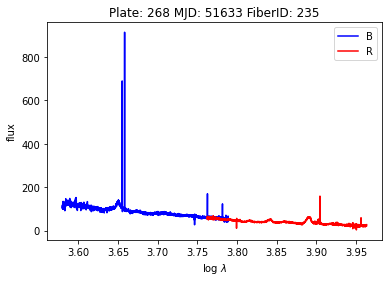

#  33


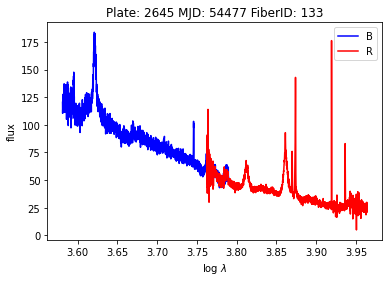

#  34


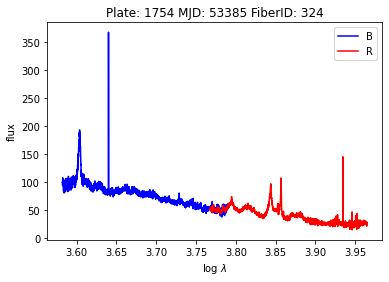

#  35


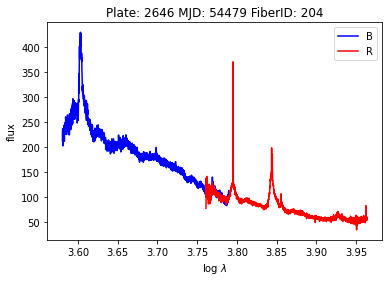

#  36


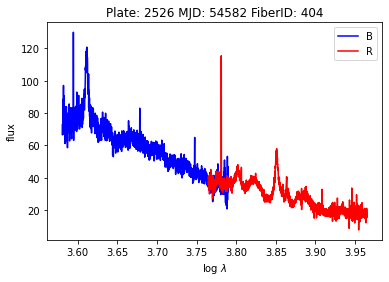

#  37


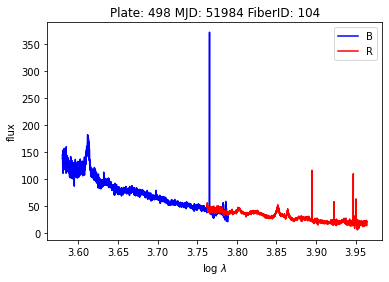

#  38


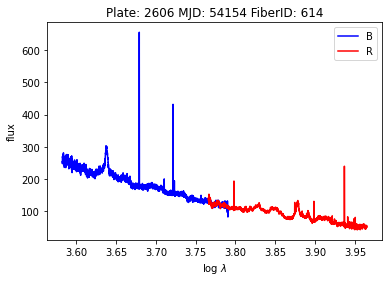

#  39


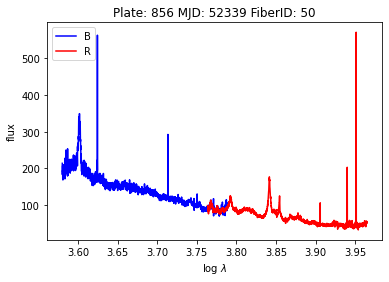

#  40


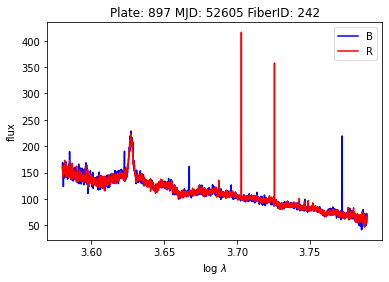

#  41


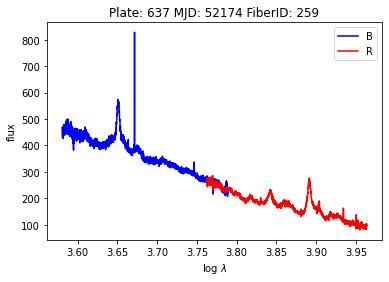

#  42


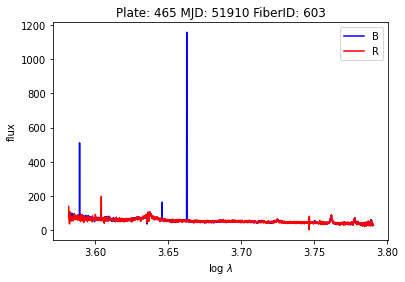

#  43


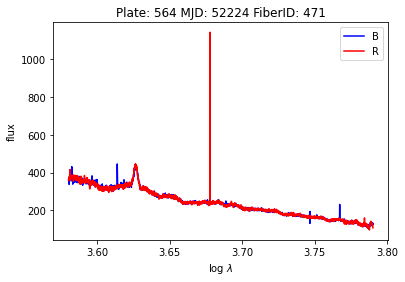

#  44


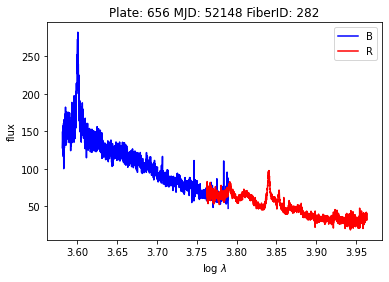

#  45


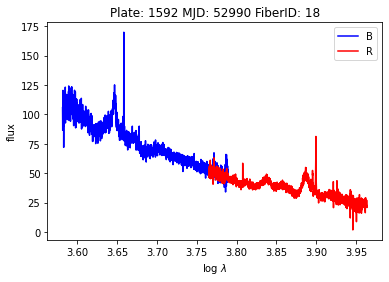

#  46


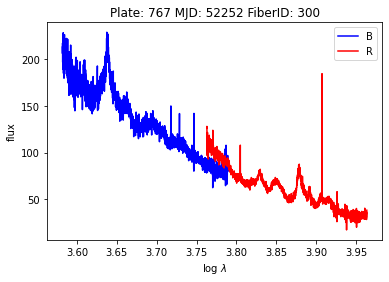

#  47


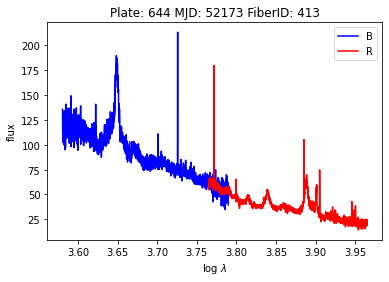

In [123]:
for i in range(len(result)):
    print("# ", i+1)
    plate=result.loc[i,"plate"]
    mjd=result.loc[i,"mjd"]
    fiberID=result.loc[i,"fiberid"]
    sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberID)
    spectrum_b = sp[0][6]
    spectrum_r = sp[0][9]
    plt.plot(spectrum_b.data['loglam'], spectrum_b.data['flux'], label='B', c='b')
    plt.plot(spectrum_r.data['loglam'], spectrum_r.data['flux'], label='R', c='r')
    plt.xlabel(r'log $\lambda$')
    plt.ylabel('flux')
    plt.title(f"Plate: {plate} MJD: {mjd} FiberID: {fiberID}")
    plt.legend()
    plt.show()
    

Note: From the results, we see 6 and 9 is not always the reduced result.